In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History

In [ ]:
IMAGE_SIZE= [224,224]

# Provide data set path

In [ ]:
train_dir = '/content/drive/MyDrive/new_ds/train/train'
test_dir = '/content/drive/MyDrive/new_ds/test/test'

In [ ]:
from glob import glob
folders=glob('/content/drive/MyDrive/new_ds/train/train/*')

In [ ]:
folders

['/content/drive/MyDrive/new_ds/train/train/Plastic_Waste',
 '/content/drive/MyDrive/new_ds/train/train/Paper_Waste',
 '/content/drive/MyDrive/new_ds/train/train/Organic_Waste',
 '/content/drive/MyDrive/new_ds/train/train/Metal_Waste',
 '/content/drive/MyDrive/new_ds/train/train/Glass_Waste',
 '/content/drive/MyDrive/new_ds/train/train/E_Waste',
 '/content/drive/MyDrive/new_ds/train/train/Clothes_Waste']

# LOAD PRETRAINED MODEL

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Don't train existing weights

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

# flatten the vgg output

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation="softmax")(x)

In [ ]:
# creating a model object

model =Model(inputs = vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Compile the model

In [ ]:

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

# Data augmentation

In [ ]:
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set=train_datagen.flow_from_directory("/content/drive/MyDrive/new_ds/train/train", target_size = (224, 224), batch_size = 32, class_mode="categorical")
 

Found 7671 images belonging to 7 classes.


In [ ]:
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/new_ds/test/test",target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 1430 images belonging to 7 classes.


# Model Training

In [ ]:
history =  model.fit(train_set,validation_data=test_set ,epochs = 20).history


Epoch 1/20
240/240 [==============================] - 2011s 8s/step - loss: 1.2737 - accuracy: 0.5637 - val_loss: 0.7667 - val_accuracy: 0.7406
Epoch 2/20
240/240 [==============================] - 153s 637ms/step - loss: 0.7941 - accuracy: 0.7269 - val_loss: 0.5642 - val_accuracy: 0.8077
Epoch 3/20
240/240 [==============================] - 153s 636ms/step - loss: 0.6776 - accuracy: 0.7720 - val_loss: 0.4932 - val_accuracy: 0.8294
Epoch 4/20
240/240 [==============================] - 153s 637ms/step - loss: 0.5193 - accuracy: 0.8239 - val_loss: 0.3782 - val_accuracy: 0.8720
Epoch 5/20
240/240 [==============================] - 152s 633ms/step - loss: 0.4295 - accuracy: 0.8543 - val_loss: 0.3051 - val_accuracy: 0.9049
Epoch 6/20
240/240 [==============================] - 154s 644ms/step - loss: 0.4102 - accuracy: 0.8576 - val_loss: 0.3134 - val_accuracy: 0.9021
Epoch 7/20
240/240 [==============================] - 154s 640ms/step - loss: 0.3616 - accuracy: 0.8779 - val_loss: 0.2372 - v

# Model accuracy

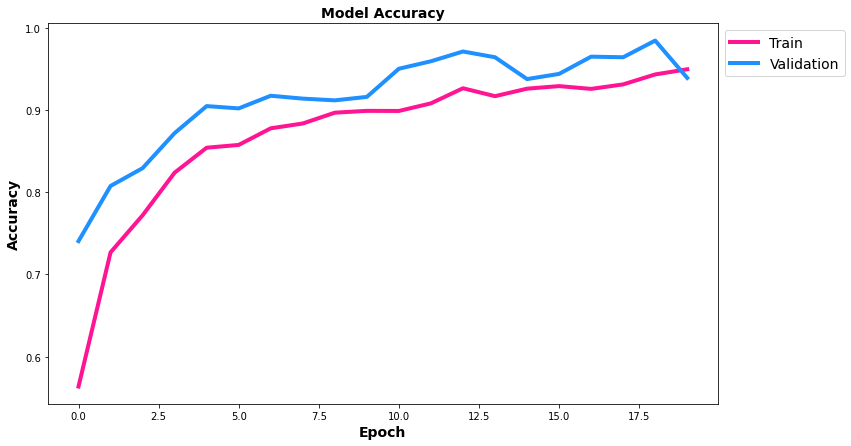

In [ ]:
# Plot the model accuracy

plt.figure(figsize=(12,7))
plt.plot(history['accuracy'], color='deeppink', linewidth=4)
plt.plot(history['val_accuracy'], color='dodgerblue', linewidth=4)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
plt.show()

# Model loss

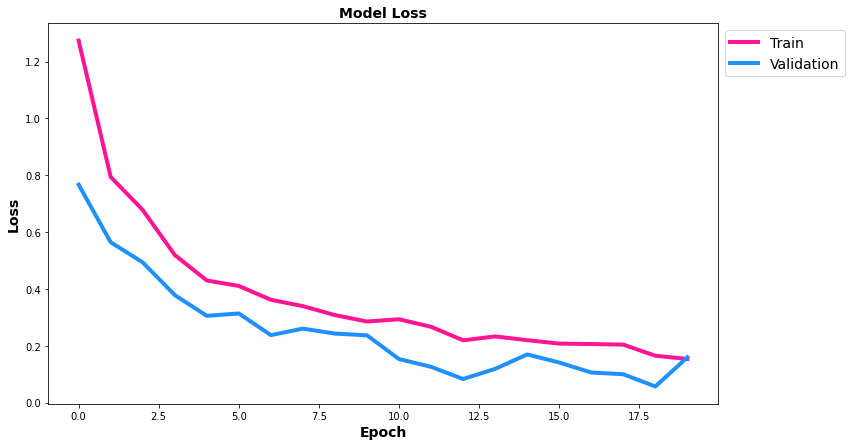

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(history['loss'], color='deeppink', linewidth=4)
plt.plot(history['val_loss'], color='dodgerblue', linewidth=4)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
plt.show()

# Save Model

In [ ]:
model.save('model.h5')